In [1]:
import pennylane as qml
import numpy as np

In [40]:
import pennylane as qml
import numpy as np


def qrom(lookup_table):
    """A subroutine that applies gates to implement the qROM oracle.

    This particular qROM should work with variable n-bit address register with
    m-bit data values at each location. Given an address register prepared in
    the address |a> = |a0 a1 ... an> to query at, the qROM should write the
    contents of the address |b_a> = |b_a0 b_a1 ... b_am> to a data register,
    like so:
           _______
     a0 ---|     |--- a0
     a1 ---|  q  |--- a1
     .. ---|  R  |--- ..
     an ---|  O  |--- an
      0 ---|  M  |--- b_a0
     .. ---|     |--- ..
      0 ---|     |--- b_am
           -------

    Args:
        lookup_table (Dict[str, str]): The contents of the memory, in the form
            {address: contents} where address is an n-bit string, and contents is
            an m-bit string (see examples in test cases).
    """
    # YOUR CODE HERE


def problem_3(lookup_table):
    """Implement a quantum lookup table, or qROM.

    A few things to note:
        - the same QNode will be used for any address in the lookup table; only a different
          address will be passed each time
        - some addresses may not have any data stored at them; consider
          |b_a> = |0...0> for this case.
        - you can assume there will be no repeated addresses in the lookup table

    Args:
        lookup_table (Dict[str, str]): The contents of the memory, in the form
            {address: contents} where address is an n-bit string, and contents is
            an m-bit string (see examples in test cases).

    Returns:
        qml.QNode: Your qROM QNode. The QNode itself should return a single
        sample obtained from measuring the data wires.
    """

    # YOUR CODE HERE: create a device of appropriate size, with shots=1
    addr = range(3)
    data = range(3, len(addr)+2)
    # dev = qml.device("default.qubit", wires=len(addr)+len(data), shots=1)
    set0 = range(16)
    set2 = range(16, 23)
    dev = qml.device("default.qubit", wires=len(set0), shots=1)

    @qml.qnode(dev)
    def query_qrom(address=None):
        """Query the qROM at the provided address.

        This QNode should make use of the qROM oracle you implemented above.

        Args:
            address (str): An n-bit string indicating the address to query at.

        Returns:
            array[int]: Results of measuring a single sample of the data wires
            (corresponds to the content of the qROM at the input address). The
            length of the sample should be m.
        """

        input = [set0[0],set0[1]]

        for ind, char in enumerate(reversed(address)):
            if char == "1":
                qml.PauliX(wires=input[ind])


        ### Routing nodes ####
        qml.MultiControlledX(set0[0],set0[2])
        qml.PauliX(set0[3])
        qml.MultiControlledX(set0[2],set0[3])

        qml.MultiControlledX([set0[1],set0[2]],set0[4])
        qml.MultiControlledX(set0[4],set0[2])

        qml.MultiControlledX([set0[1],set0[3]],set0[5])
        qml.MultiControlledX(set0[5],set0[3])

        qml.Barrier()


        ### Writing to memory cell ###

                 # 00       01       10      11
        memory = [set0[6],set0[7],set0[8],set0[9],
                 # 00       01       10      11
                  set0[11],set0[12],set0[13],set0[14]]


        for addr_value, data_value in lookup_table.items():
            if addr_value == "00":
                if data_value == "00":
                    pass
                elif data_value == "01":
                    qml.PauliX(wires=set0[6])
                elif data_value == "10":
                    qml.PauliX(wires=set0[11])
                elif data_value == "11":
                    qml.PauliX(wires=set0[6])
                    qml.PauliX(wires=set0[11])
            elif addr_value == "01":
                if data_value == "00":
                    pass
                elif data_value == "01":
                    qml.PauliX(wires=set0[7])
                elif data_value == "10":
                    qml.PauliX(wires=set0[12])
                elif data_value == "11":
                    qml.PauliX(wires=set0[7])
                    qml.PauliX(wires=set0[12])
            elif addr_value == "10":
                if data_value == "00":
                    pass
                elif data_value == "01":
                    qml.PauliX(wires=set0[8])
                elif data_value == "10":
                    qml.PauliX(wires=set0[13])
                elif data_value == "11":
                    qml.PauliX(wires=set0[8])
                    qml.PauliX(wires=set0[13])
            elif addr_value == "11":
                if data_value == "00":
                    pass
                elif data_value == "01":
                    qml.PauliX(wires=set0[9])
                elif data_value == "10":
                    qml.PauliX(wires=set0[14])
                elif data_value == "11":
                    qml.PauliX(wires=set0[9])
                    qml.PauliX(wires=set0[14])


        ### Reading memory cell 0 ###
        qml.MultiControlledX([set0[4],set0[9]],set0[10])
        qml.MultiControlledX([set0[5],set0[8]],set0[10])
        qml.MultiControlledX([set0[2],set0[7]],set0[10])
        qml.MultiControlledX([set0[3],set0[6]],set0[10])
        qml.Barrier()

        ### Reading memory cell 1 ###
        qml.MultiControlledX([set0[4],set0[14]],set0[15])
        qml.MultiControlledX([set0[5],set0[13]],set0[15])
        qml.MultiControlledX([set0[2],set0[12]],set0[15])
        qml.MultiControlledX([set0[3],set0[11]],set0[15])
        qml.Barrier()

        return qml.sample(wires=[set0[15],set0[10]])

    return query_qrom

lookup_table = {
    "00":"01",
    "01":"10",
    "10":"11",
    "11":"11"
}

# lookup_table = {
#     "00":"00",
#     "01":"00",
#     "10":"00",
#     "11":"00"
# }

print(problem_3(lookup_table)("00"))
print(problem_3(lookup_table)("01"))
print(problem_3(lookup_table)("10"))
print(problem_3(lookup_table)("11"))

[0 1]
[1 0]
[1 1]
[1 1]


(<Figure size 2100x1700 with 1 Axes>, <Axes: >)

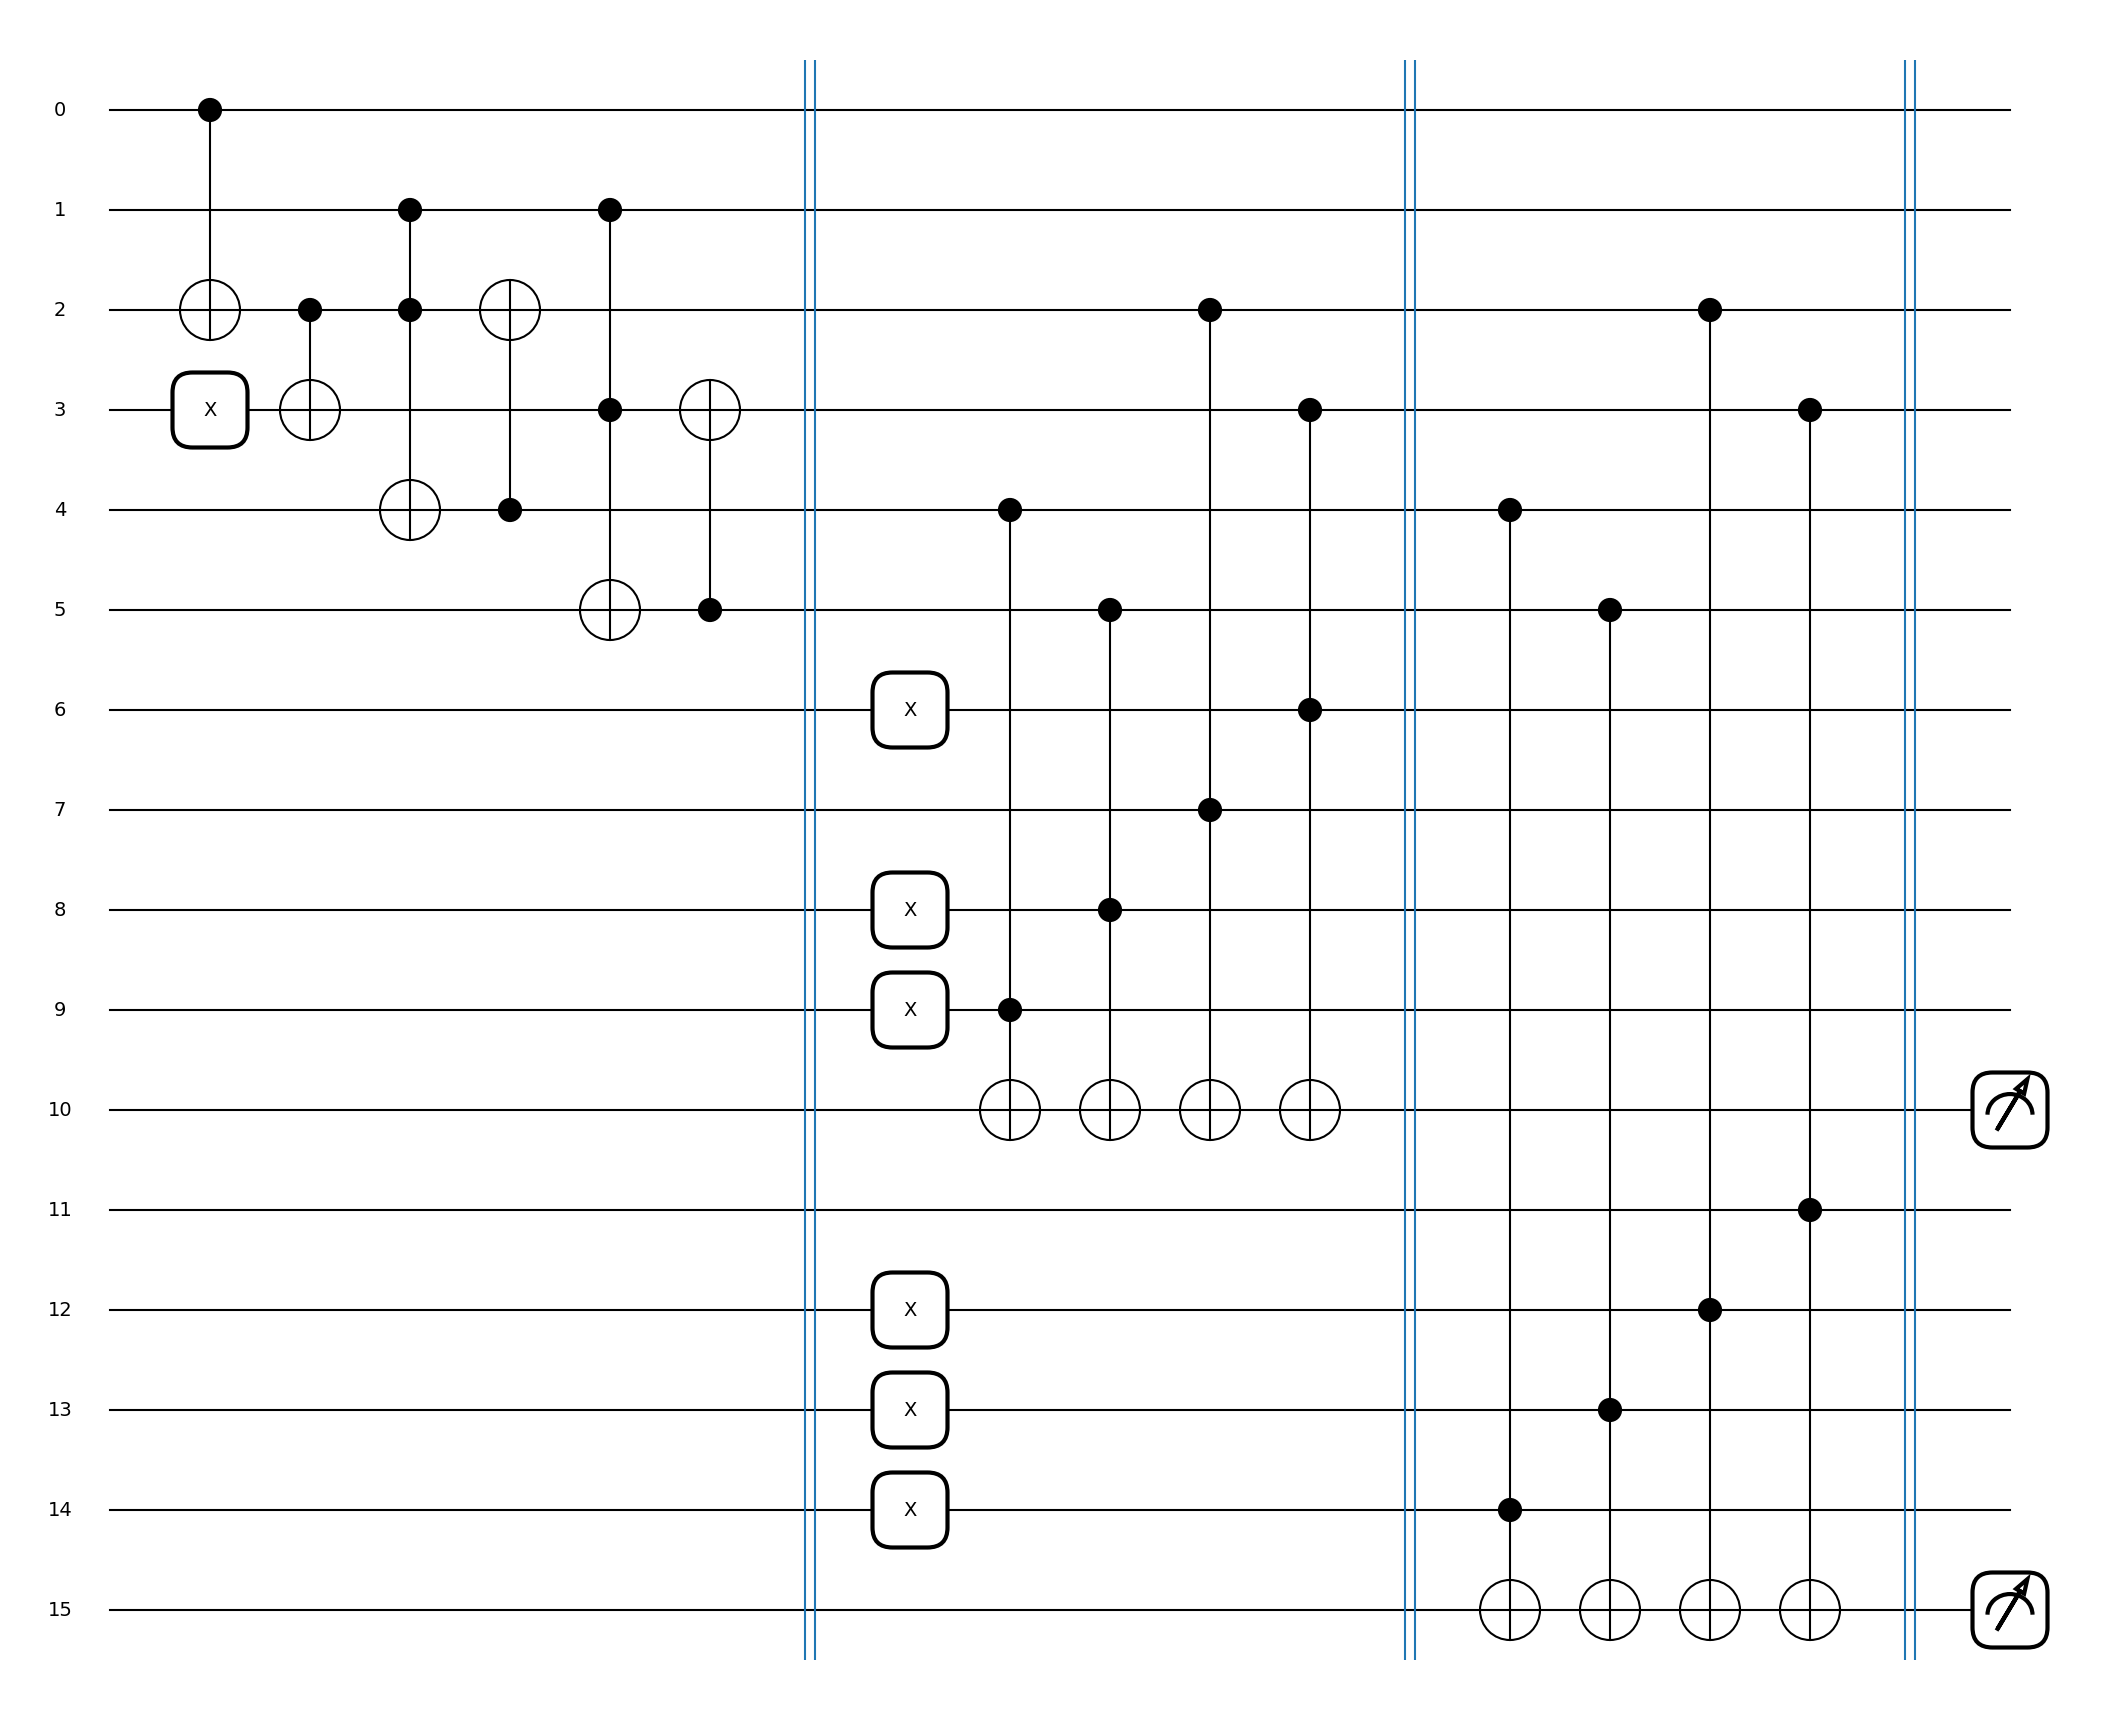

In [37]:
qml.draw_mpl(problem_3(lookup_table))("00")

In [35]:
import pennylane as qml
import numpy as np


lookup_table = {
    "000":"01",
    "001":"10",
    "010":"11",
    "011":"11"
}

def qrom(lookup_table):
    """A subroutine that applies gates to implement the qROM oracle.

    This particular qROM should work with variable n-bit address register with
    m-bit data values at each location. Given an address register prepared in
    the address |a> = |a0 a1 ... an> to query at, the qROM should write the
    contents of the address |b_a> = |b_a0 b_a1 ... b_am> to a data register,
    like so:
           _______
     a0 ---|     |--- a0
     a1 ---|  q  |--- a1
     .. ---|  R  |--- ..
     an ---|  O  |--- an
      0 ---|  M  |--- b_a0
     .. ---|     |--- ..
      0 ---|     |--- b_am
           -------

    Args:
        lookup_table (Dict[str, str]): The contents of the memory, in the form
            {address: contents} where address is an n-bit string, and contents is
            an m-bit string (see examples in test cases).
    """
    # YOUR CODE HERE


def problem_3(lookup_table):
    """Implement a quantum lookup table, or qROM.

    A few things to note:
        - the same QNode will be used for any address in the lookup table; only a different
          address will be passed each time
        - some addresses may not have any data stored at them; consider
          |b_a> = |0...0> for this case.
        - you can assume there will be no repeated addresses in the lookup table

    Args:
        lookup_table (Dict[str, str]): The contents of the memory, in the form
            {address: contents} where address is an n-bit string, and contents is
            an m-bit string (see examples in test cases).

    Returns:
        qml.QNode: Your qROM QNode. The QNode itself should return a single
        sample obtained from measuring the data wires.
    """

    # YOUR CODE HERE: create a device of appropriate size, with shots=1
    addr = range(3)
    data = range(3, len(addr)+2)
    # dev = qml.device("default.qubit", wires=len(addr)+len(data), shots=1)
    dev = qml.device("default.qubit", wires=24, shots=1)
    set0 = range(12)
    set1 = range(12, 12+12)
    @qml.qnode(dev)
    def query_qrom(address=None):
        """Query the qROM at the provided address.

        This QNode should make use of the qROM oracle you implemented above.

        Args:
            address (str): An n-bit string indicating the address to query at.

        Returns:
            array[int]: Results of measuring a single sample of the data wires
            (corresponds to the content of the qROM at the input address). The
            length of the sample should be m.
        """

        input = [set0[0],set0[1],set1[0],set1[1]]

        for ind, char in enumerate(address):
            if char == "1":
                qml.PauliX(wires=input[ind])


        ### Routing nodes ####
        qml.MultiControlledX(set0[0],set0[2])
        qml.PauliX(set0[3])
        qml.MultiControlledX(set0[2],set0[3])

        qml.MultiControlledX([set0[1],set0[2]],set0[4])
        qml.MultiControlledX(set0[4],set0[2])

        qml.MultiControlledX([set0[1],set0[3]],set0[5])
        qml.MultiControlledX(set0[5],set0[3])

        qml.Barrier()

        ### Routing nodes ####
        qml.MultiControlledX(set1[0],set1[2])
        qml.PauliX(set1[3])
        qml.MultiControlledX(set1[2],set1[3])

        qml.MultiControlledX([set1[1],set1[2]],set1[4])
        qml.MultiControlledX(set1[4],set1[2])

        qml.MultiControlledX([set1[1],set1[3]],set1[5])
        qml.MultiControlledX(set1[5],set1[3])

        qml.Barrier()


        ### Writing to memory cell ###

        # for key, val in lookup_table.items():


        qml.PauliX(set0[7])
        qml.PauliX(set0[8])


        ### Reading memory cell ###
        qml.MultiControlledX([set0[4],set0[9]],set0[10])
        qml.MultiControlledX([set0[5],set0[8]],set0[10])
        qml.MultiControlledX([set0[2],set0[7]],set0[10])
        qml.MultiControlledX([set0[3],set0[6]],set0[10])
        qml.Barrier()

        ### Reading memory cell ###
        qml.MultiControlledX([set1[4],set1[9]],set1[10])
        qml.MultiControlledX([set1[5],set1[8]],set1[10])
        qml.MultiControlledX([set1[2],set1[7]],set1[10])
        qml.MultiControlledX([set1[3],set1[6]],set1[10])
        qml.Barrier()

        return qml.sample(wires=[set0[10], set1[10]])

    return query_qrom
    # return lookup_table